# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [5]:
data_file = "pizza_delivery_locations.csv"

In [6]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [15]:
# clustering code for 2,3 and 4 clusters
K = 2

from sklearn.cluster import KMeans

# Check if data is already a numpy array, if not, convert it
if not isinstance(data, np.ndarray):
    data_np = data.to_numpy()
else:
    data_np = data

# Function to perform K-means clustering and retrieve centroids as tuples
def find_store_locations(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    centroids = kmeans.cluster_centers_
    return [(round(centroid[0], 6), round(centroid[1], 6)) for centroid in centroids]

# Perform clustering for K=2, K=3, and K=4
store_locations_k2 = find_store_locations(data_np, 2)
store_locations_k3 = find_store_locations(data_np, 3)
store_locations_k4 = find_store_locations(data_np, 4)


/Users/zixinye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zixinye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zixinye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Extracting best store locations for each cluster of addresses
print("Store locations for K=2:", store_locations_k2)
print("Store locations for K=3:", store_locations_k3)
print("Store locations for K=4:", store_locations_k4)


Store locations for K=2: [(43.668166, -116.266048), (43.637273, -116.225247)]
Store locations for K=3: [(43.668166, -116.266048), (43.641814, -116.240366), (43.63263, -116.209792)]
Store locations for K=4: [(43.663956, -116.266879), (43.641814, -116.240366), (43.63263, -116.209792), (43.723879, -116.255046)]


## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

/Users/zixinye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


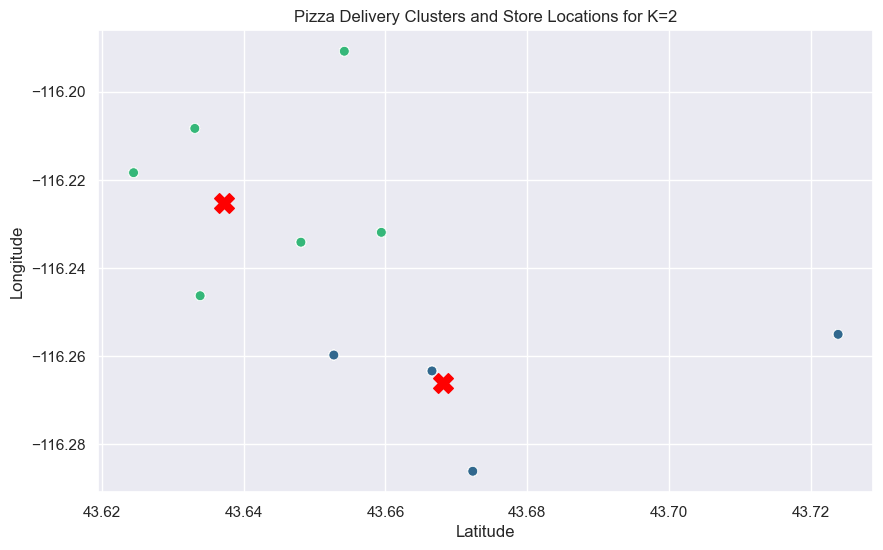

/Users/zixinye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


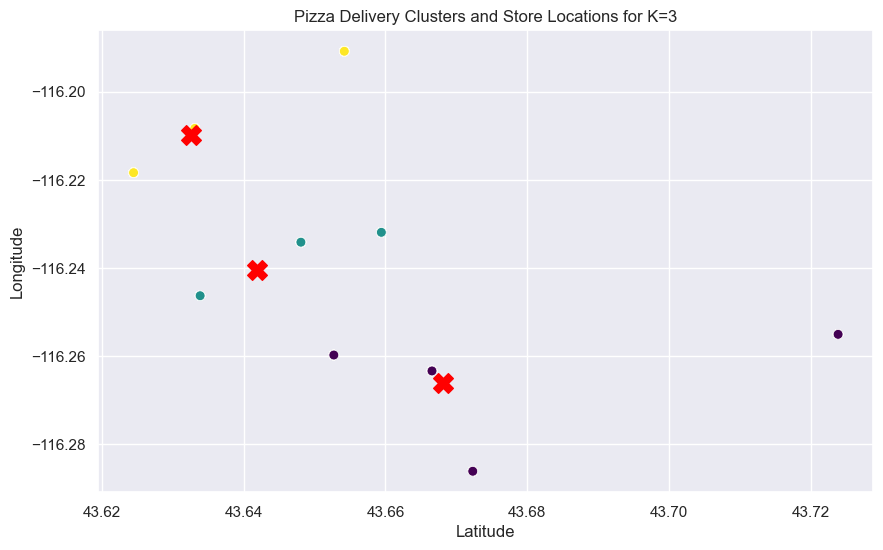

/Users/zixinye/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


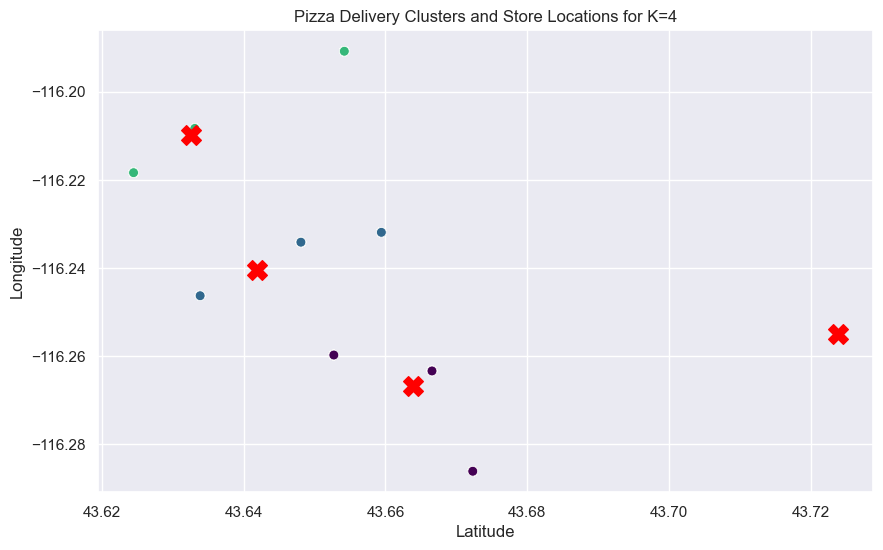

In [17]:
import seaborn as sns

def plot_clusters(data, centroids, k):
    # Convert centroids to a numpy array if not already
    centroids = np.array(centroids)

    # Fit the K-means model to get labels for each point
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    labels = kmeans.labels_
    
    # Setting up the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="viridis", style=labels, s=50, markers=['o']*k, legend=None)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # Centroid markers
    plt.title(f'Pizza Delivery Clusters and Store Locations for K={k}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.show()

# Already calculated centroids can be reused here:
plot_clusters(data_np, store_locations_k2, 2)
plot_clusters(data_np, store_locations_k3, 3)
plot_clusters(data_np, store_locations_k4, 4)


## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.